#### Importing libreary


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [111]:
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

In [112]:
df = pd.read_csv('auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

In [113]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


#### Problem Statement —
 The data contains the MPG (Mile Per Gallon) variable which is continuous data and tells us about the efficiency of fuel consumption of a vehicle in the 70s and 80s.

**Our aim here is to predict the MPG value for a vehicle, given that we have other attributes of that vehicle.**

### (Exploratory Data Analysis)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [115]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [116]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

##### Horsepower has missing 6 value.So I am handaling missing value.

In [117]:
df['Horsepower']=df['Horsepower'].fillna(df['Horsepower'].median())

In [118]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

##### Now no missing value

In [119]:
df.duplicated().sum()

0

#### No duplicate value

In [120]:
df['Cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [121]:
nunique_values_list = [df[col].nunique() for col in df.columns]

    

In [122]:
nunique_values_list

[129, 5, 82, 94, 351, 95, 13, 3]

In [123]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [124]:
df['Cylinders'].sample(10)

266    4
157    8
149    4
109    4
240    4
163    6
252    6
265    8
83     4
160    6
Name: Cylinders, dtype: int64

In [125]:
df['Origin'].sample(15)

61     1
193    1
11     1
94     1
211    2
174    1
218    2
276    2
356    3
287    1
254    1
111    3
144    3
369    1
132    1
Name: Origin, dtype: int64

#### Both Cylinders and 'Origin' columns are catagorical value. And other columns are numarical column 

#### Now find  The category distribution in categorical columns

In [126]:
cyl_wise_count=df['Cylinders'].value_counts()

In [127]:
cyl_wise_count

Cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

C:\Users\SIZAN\AppData\Local\Temp\ipykernel_8980\1446379776.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cyl_wise_count,palette='bright')


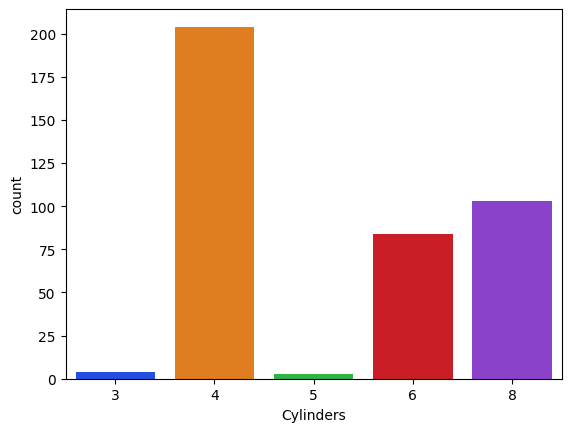

In [128]:
sns.barplot(data=cyl_wise_count,palette='bright')
plt.show()

In [129]:
origin_wise_count=df['Origin'].value_counts()

In [130]:
origin_wise_count

Origin
1    249
3     79
2     70
Name: count, dtype: int64

C:\Users\SIZAN\AppData\Local\Temp\ipykernel_8980\602684227.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=origin_wise_count,palette='bright')


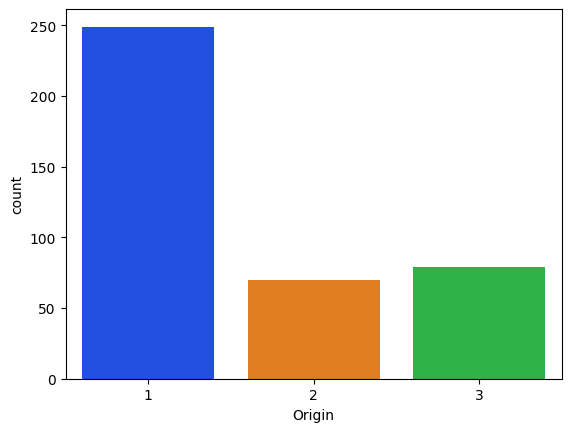

In [131]:
sns.barplot(data=origin_wise_count,palette='bright')
plt.show()

#### Pair-plot to find relation of data


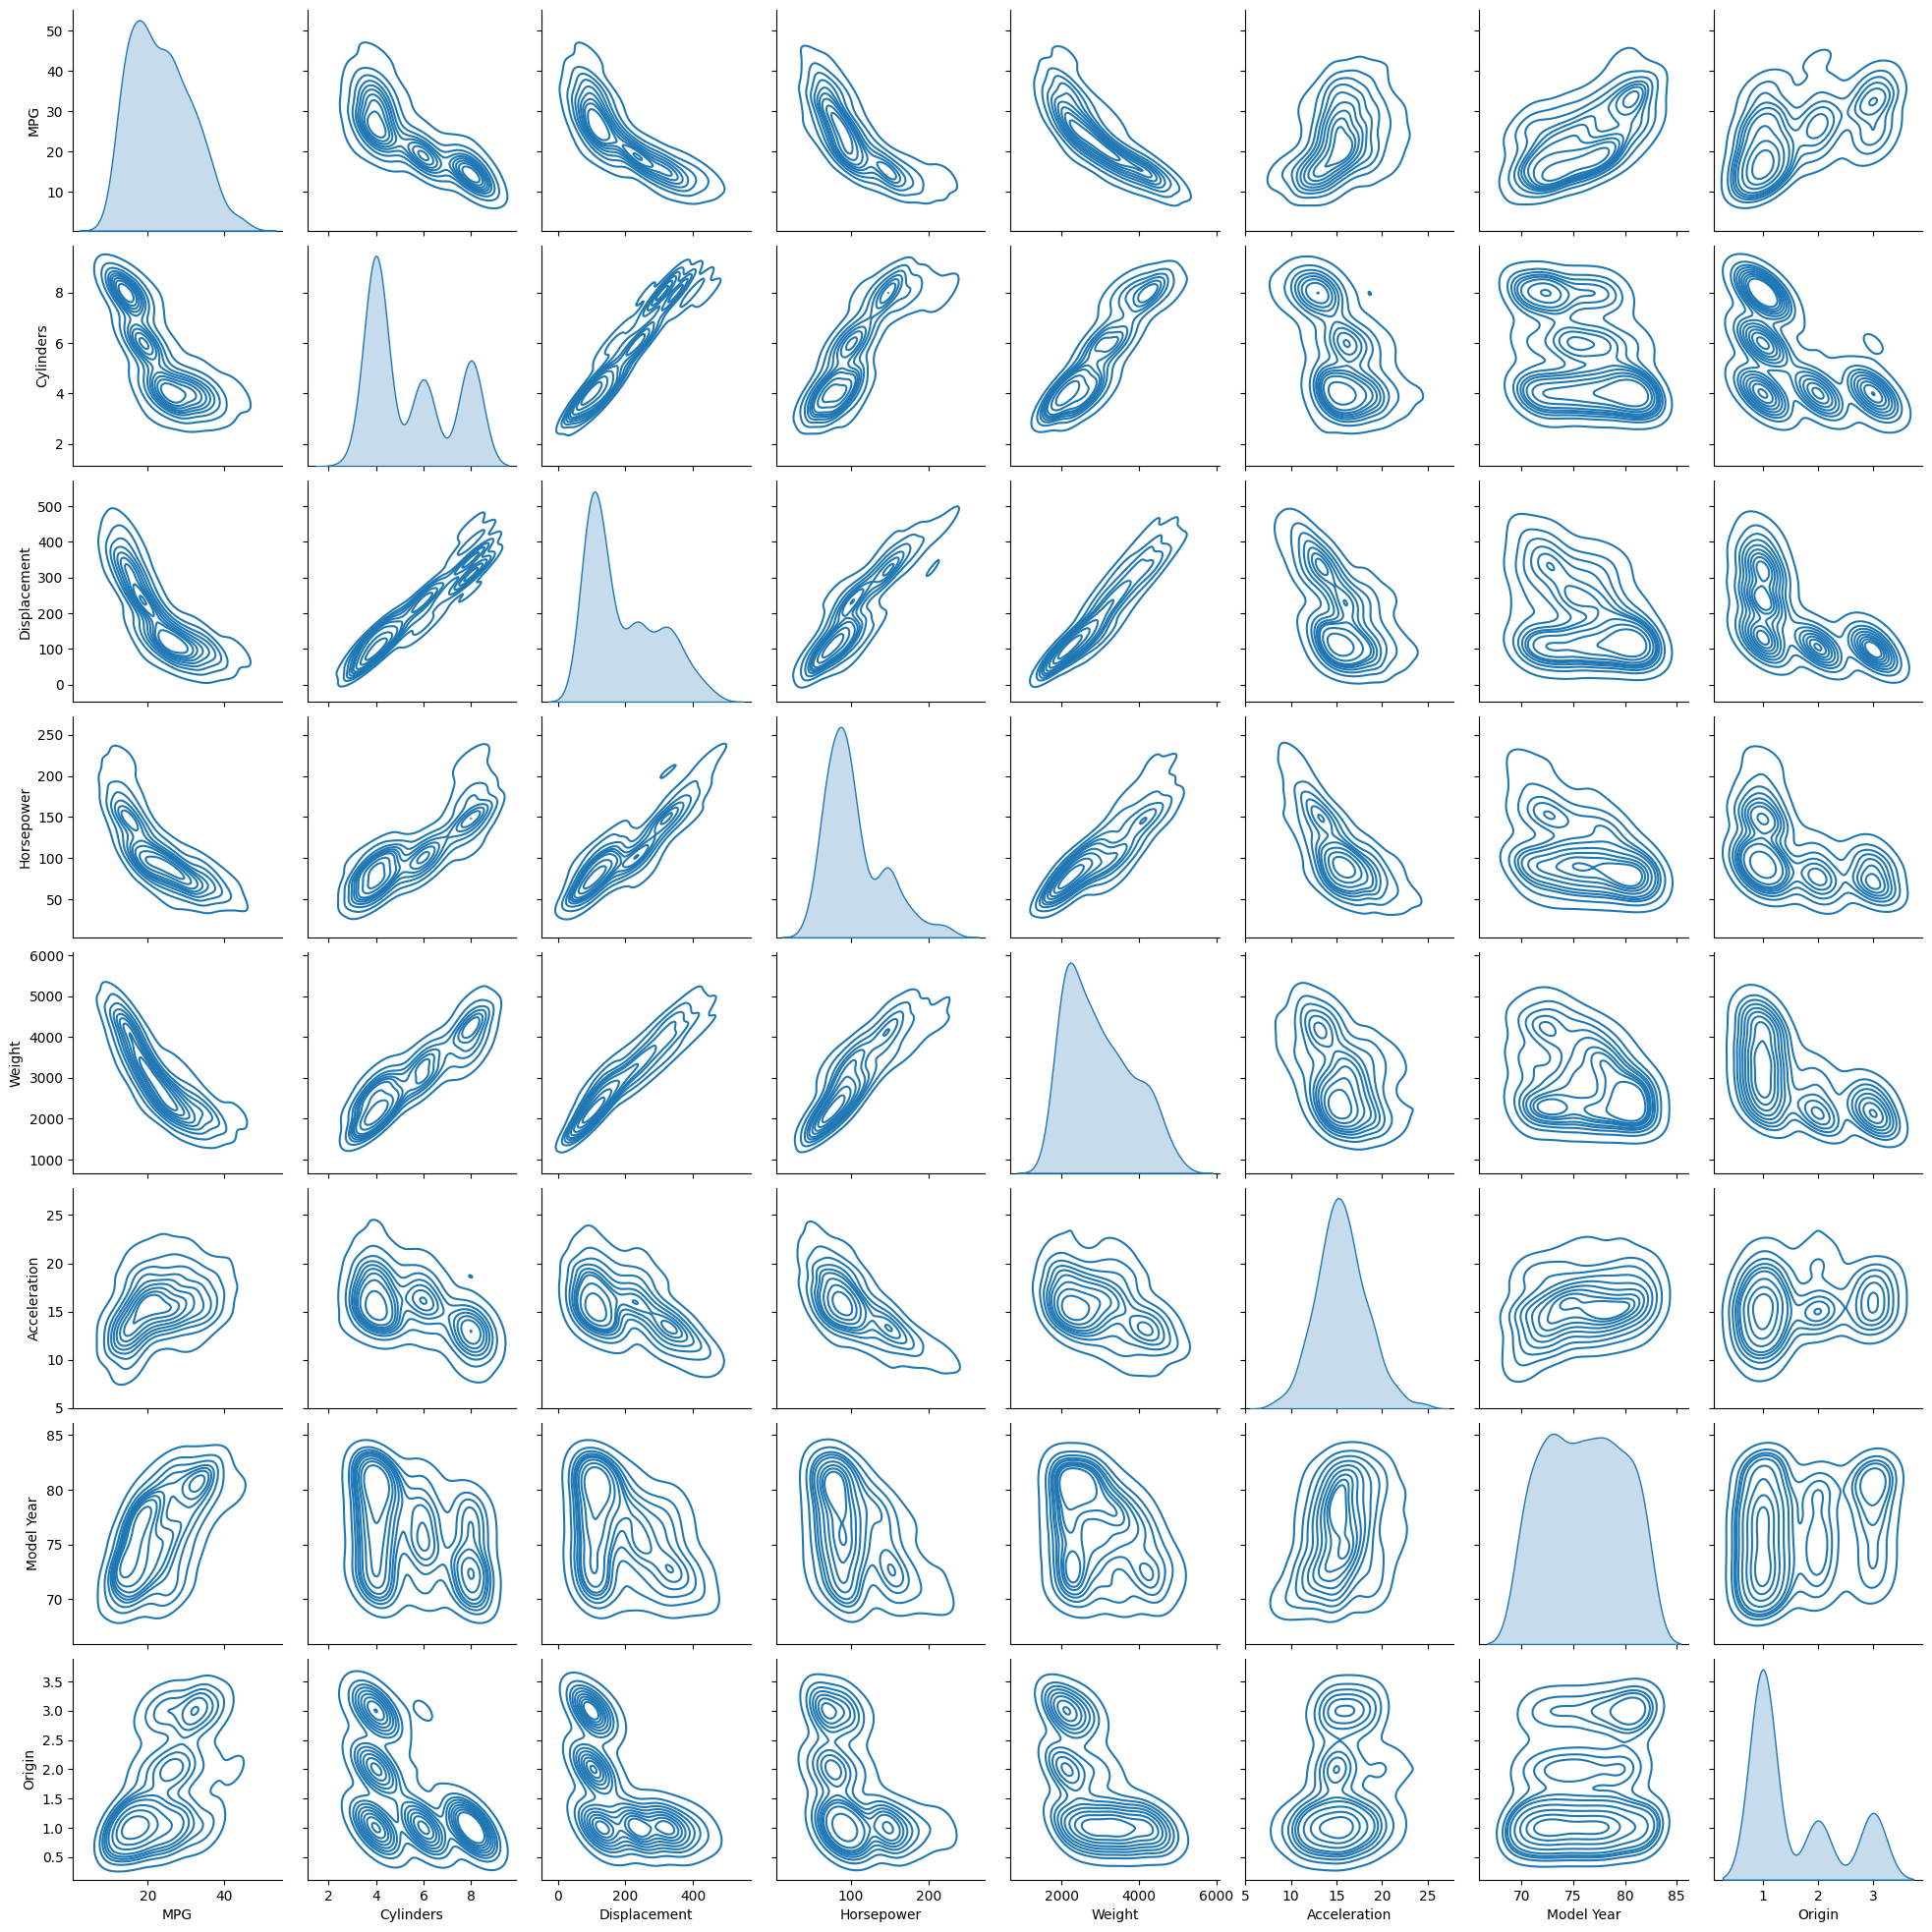

In [132]:
sns.pairplot(data=df,kind='kde')
plt.show()

##### Interpretation:
By examining the histograms along the diagonal, we gain insights into the distribution of each variable.
The scatter plots off-diagonal allow us to explore relationships between pairs of variables.
For instance, we can observe whether there’s a linear relationship between MPG and other features like weight or horsepower.
Clusters in scatterplots involving the Cylinders variable may indicate distinct groupings due to discrete values (3, 4, 5, 6, or 8 cylinders).

#### Corilation:

In [133]:
corr_matrix=df.corr()

In [134]:
corr_matrix

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
Cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
Displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
Horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
Weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
Acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
Model Year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
Origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


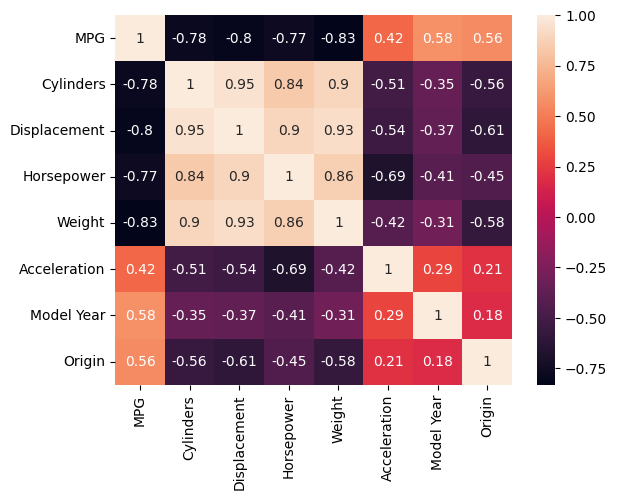

In [135]:
sns.heatmap(data=corr_matrix,annot=True)
plt.show()

#### Here are some key observations:

**MPG (Miles Per Gallon):**  

*MPG has a strong negative correlation with Cylinders, Displacement,  
Horsepower, and Weight.  
This makes sense because as the number of cylinders, engine displacement, horsepower, and weight increase, fuel efficiency (MPG) tends to decrease.*  

**Cylinders:**  

Cylinders have a strong positive correlation with Displacement and Horsepower.  

More cylinders typically mean larger engine displacement and higher horsepower.  

**Displacement:**  

Displacement is positively correlated with Horsepower and Weight.
Larger engine displacement often leads to more power and heavier vehicles.  

**Horsepower:**  

Horsepower has a strong positive correlation with Weight.
Heavier vehicles tend to have more powerful engines.  

**Weight:**  

Weight is negatively correlated with MPG and positively correlated with Horsepower.  

Heavier cars consume more fuel (lower MPG) and often have more powerful engines.  

**Acceleration:**  

Acceleration has a moderate positive correlation with MPG.
Faster acceleration might lead to better fuel efficiency.  

**Model Year:**  

Model year has a positive correlation with Acceleration.
Newer cars tend to have better acceleration.  

**Origin:**  

Origin (presumably representing the country of origin) has correlations with other features, but it’s not straightforward to interpret without knowing the specific encoding used for origin.  

*In summary, this correlation matrix provides insights into how these automotive features relate to each other.*  


##### EDA Done.

### Machine Learning Procedure start:

In [136]:
## Data Pre_processing
df['Origin']=df['Origin'].map({1:"Bangladesh",2:"USA",3:"Germany"})

In [137]:
df.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
143,26.0,4,97.0,78.0,2300.0,14.5,74,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,Bangladesh
193,24.0,6,200.0,81.0,3012.0,17.6,76,Bangladesh
329,44.6,4,91.0,67.0,1850.0,13.8,80,Germany
192,22.0,6,250.0,105.0,3353.0,14.5,76,Bangladesh
198,33.0,4,91.0,53.0,1795.0,17.4,76,Germany
31,25.0,4,113.0,95.0,2228.0,14.0,71,Germany
137,13.0,8,350.0,150.0,4699.0,14.5,74,Bangladesh
274,20.3,5,131.0,103.0,2830.0,15.9,78,USA
241,22.0,6,146.0,97.0,2815.0,14.5,77,Germany


In [138]:
df1=pd.get_dummies(df['Origin']).astype(int)

In [139]:
df.join(df1).head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Bangladesh,Germany,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,Bangladesh,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,Bangladesh,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,Bangladesh,1,0,0


In [140]:
df=df.drop(columns='Origin')

In [141]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year'],
      dtype='object')

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


##### Linear_Regression_model

In [143]:
X=df.drop(columns="MPG")
y=df[['MPG']]

In [144]:
X

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,8,307.0,130.0,3504.0,12.0,70
1,8,350.0,165.0,3693.0,11.5,70
2,8,318.0,150.0,3436.0,11.0,70
3,8,304.0,150.0,3433.0,12.0,70
4,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82
394,4,97.0,52.0,2130.0,24.6,82
395,4,135.0,84.0,2295.0,11.6,82
396,4,120.0,79.0,2625.0,18.6,82


In [145]:
y

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [149]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [150]:
y_train

,MPG
245,36.1
110,22.0
16,18.0
66,17.0
153,18.0
...,...
71,19.0
106,12.0
270,21.1
348,37.7


In [151]:
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

LinearRegression()

In [153]:
y_predict=model_linear.predict(x_test)

In [155]:
y_predict[0:5]

array([[31.46864176],
       [30.79720995],
       [21.53578792],
       [16.97698166],
       [12.64778244]])

In [165]:
score=model_linear.score(x_test,y_test)

In [166]:
score

0.8271895043901392

#### Model Evaluating

In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [167]:
print("Mean_squared_error:",mean_squared_error(y_test,y_predict))
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("R2 score :",r2_score(y_test,y_predict))
print("Score :",score)

Mean_squared_error: 9.81278754243046
Mean_absolute_error: 2.529332206720145
R2 score : 0.8271895043901392
Score : 0.8271895043901392


##### DecisionTreeRegressor

In [168]:
model_tree=DecisionTreeRegressor()
model_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [169]:
y_predict=model_tree.predict(x_test)

In [170]:
y_predict[0:5]

array([29. , 26. , 21. , 15. , 17.5])

In [171]:
score=model_tree.score(x_test,y_test)

In [172]:
score

0.7756408743692447

In [173]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [174]:
print("Mean_squared_error:",mean_squared_error(y_test,y_predict))
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("R2 score :",r2_score(y_test,y_predict))
print("Score :",score)

Mean_squared_error: 12.739900000000002
Mean_absolute_error: 2.5290000000000004
R2 score : 0.7756408743692447
Score : 0.7756408743692447


##### Random_Forest_Regressor

In [175]:
model_ensumble=RandomForestRegressor()
model_ensumble.fit(x_train,y_train)
y_predict=model_ensumble.predict(x_test)
y_predict[0:5]
score=model_ensumble.score(x_test,y_test)
print("Mean_squared_error:",mean_squared_error(y_test,y_predict))
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("R2 score :",r2_score(y_test,y_predict))
print("Score :",score)


c:\Users\SIZAN\miniconda3\envs\tf_env\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean_squared_error: 6.498325520000005
Mean_absolute_error: 1.77612
R2 score : 0.8855596486839595
Score : 0.8855596486839595
